In [44]:
x_min = 210
y_min = 334
width = 110
height = 112
img_width = 640
img_height = 480

In [73]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import re

In [59]:
x_min = 210
y_min = 334
width = 110
height = 112
img_width = 640
img_height = 480

In [80]:
def coco_to_token(bbox,img_width=640,img_height=480):
    """
    required_token_format: (y_min, x_min, y_max, x_max)
    """
    x_min, y_min, width, height = bbox
    new_x_min = int((x_min/img_width) * 1024)
    new_x_max = int(((x_min+width)/img_width) * 1024)
    new_y_min = int((y_min/img_height) * 1024)
    new_y_max = int(((y_min+height)/img_height) * 1024)
    new_bbox = [new_y_min, new_x_min, new_y_max, new_x_max]
    return [f"<|loc{val:04d}|>" for val in new_bbox]

def token_to_coco(tokens,img_width=640,img_height=480):
    norm = lambda c,d : (c/1024) * d

    vals = [int(re.search(r"\d+", t).group()) for t in tokens]
    y_min, x_min, y_max, x_max = vals
    y_min, y_max = norm(y_min, img_height), norm(y_max, img_height)
    x_min, x_max = norm(x_min, img_width), norm(x_max, img_width)

    width = x_max - x_min
    height = x_max - x_min
    return [x_min, y_min, width, height]

In [77]:
im = Image.fromarray(np.ones((img_height,img_width,3),dtype=np.uint8)*255)
im.size

(640, 480)

In [81]:
bbox=[x_min,y_min,width,height]
bbox, coco_to_token(bbox, *im.size), token_to_coco(coco_to_token(bbox, *im.size))

([210, 334, 110, 112],
 ['<|loc0712|>', '<|loc0336|>', '<|loc0951|>', '<|loc0512|>'],
 [210.0, 333.75, 110.0, 110.0])

In [24]:
def show_bbox(image,x_min,y_min,width,height):
    print(x_min,x_min+width,y_min,y_min+height)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.imshow(image)
    ax.add_patch(rect)
    plt.show()

210 320 334 446


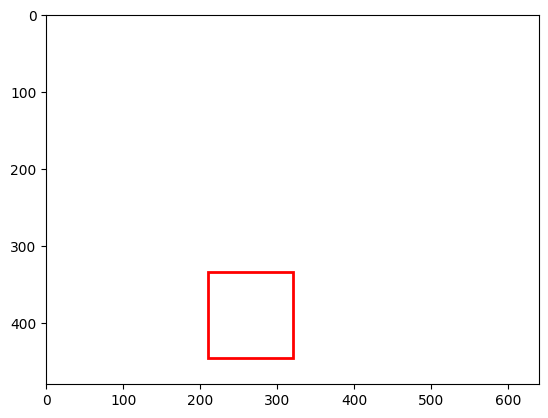

In [27]:
show_bbox(im,x_min,y_min,width,height)